# EDA on the NYC Taxi Trip Dataset

In [3]:
#Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats
from datetime import datetime

In [4]:
# Reading the datset

df = pd.read_csv('C:\\Users\\Roopesh\\Downloads\\NYC Taxi Data.csv')

In [5]:
# Getting the initial inferences of the dataset

df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
df.shape

(1458644, 11)

In [7]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [10]:
# Knowing about the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


## Univariate data Analysis

2    780302
1    678342
Name: vendor_id, dtype: int64


C:\Users\Roopesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vendor_id', ylabel='count'>

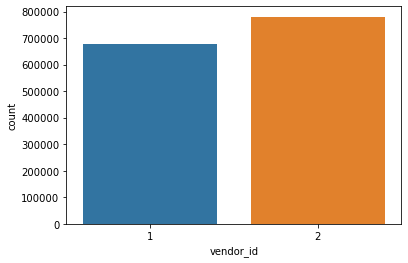

In [11]:
# Analysis on the vendor id feature

print(df['vendor_id'].value_counts())
sns.countplot(df['vendor_id'])

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64


C:\Users\Roopesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='passenger_count', ylabel='count'>

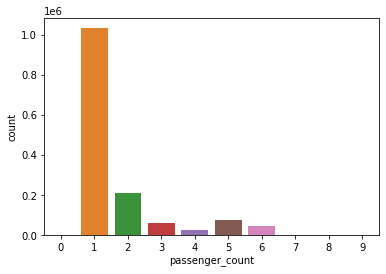

In [12]:
# Analysis made on passenger count

print(df['passenger_count'].value_counts())
sns.countplot(df['passenger_count'])

### We could see that most of the rides have only single passenger and there are some trips which contain zero and very few with 7,8,9 passengers these could be cleaned up in data cleaning.

Text(0.5, 1.0, 'Dropoff')

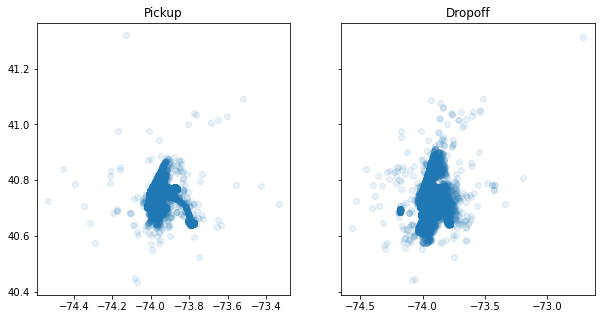

In [13]:
# Analysis made on pickup and dropoff latitudes and longitudes

n = 100000 
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
ax1.scatter(df.pickup_longitude[:n], 
            df.pickup_latitude[:n],
            alpha = 0.1)
ax1.set_title('Pickup')
ax2.scatter(df.dropoff_longitude[:n], 
            df.dropoff_latitude[:n],
            alpha = 0.1)
ax2.set_title('Dropoff')

In [14]:
# Analysis made on flag variable in dataset

df['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

C:\Users\Roopesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

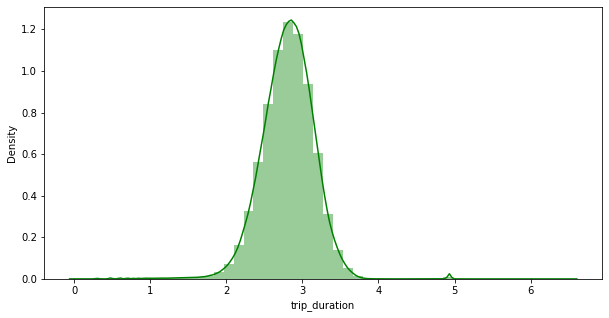

In [15]:
# Analysis made on trip duration in datset

plt.figure(figsize=(10,5))
sns.distplot(np.log10(df['trip_duration']),color="g")

#### From the above graph we could see that trip duration almost follows normal distribution

## Feature Engineering for more information from features

In [16]:
# Converting the trip duration in hours format fr ease in understanding

df['time_hr'] = df['trip_duration']/(3600)

In [17]:
# Function to find the distance with respect to pickup and dropoff longitudes and latitudes with Havesine formula.
# Note : This distance is assumed to be the flying distance not the distance through the road.

def distance(row):
    R = 6371000.0 # Radius of the earth in metres
    
    lat1 = math.radians(row['pickup_latitude'])
    lon1 = math.radians(row['pickup_longitude'])
    lat2 = math.radians(row['dropoff_latitude'])
    lon2 = math.radians(row['dropoff_longitude'])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    final_distance = R * c
    km = final_distance/1000
    return km

In [18]:
df['Distance'] = df.apply(distance,axis=1) # Applying the distance function and calculating the distance in the dataset.

In [19]:
# Function to find the speed of the vehicle with the respect of Distance and time.

def speed(row):
    sp = (row['Distance']/(row['time_hr']))
    return sp

In [20]:
df['Speed'] = df.apply(speed,axis=1) # Applying the speed functin to the dataset

In [21]:
# We have observed that the timedate feature column is in str format hence converting them into datetime64 

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [22]:
# Extracting time,date,day from the datetime64 columns

df['pickup_date_month'] = df['pickup_datetime'].dt.month
df['pickup_date'] = df['pickup_datetime'].dt.day
df['pickup_hour'] = df['dropoff_datetime'].dt.hour
df['pickup_date_day'] = df['pickup_datetime'].dt.day_name()
df['dropoff_date_day'] = df['dropoff_datetime'].dt.day_name()
df['week_in_num'] = df['pickup_datetime'].dt.weekday

In [23]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_hr,Distance,Speed,pickup_date_month,pickup_date,pickup_hour,pickup_date_day,dropoff_date_day,week_in_num
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0.126389,1.498521,11.856428,3,14,17,Monday,Monday,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0.184167,1.805507,9.803659,6,12,0,Sunday,Sunday,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,0.590000,6.385098,10.822201,1,19,12,Tuesday,Tuesday,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0.119167,1.485498,12.465721,4,6,19,Wednesday,Wednesday,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0.120833,1.188588,9.836594,3,26,13,Saturday,Saturday,5


C:\Users\Roopesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pickup_date_month', ylabel='count'>

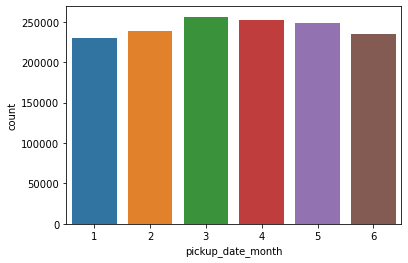

In [24]:
# Analysis on the new featured variables

sns.countplot(df['pickup_date_month'])

#### We could say that trips in every month are not uniform from above analysis

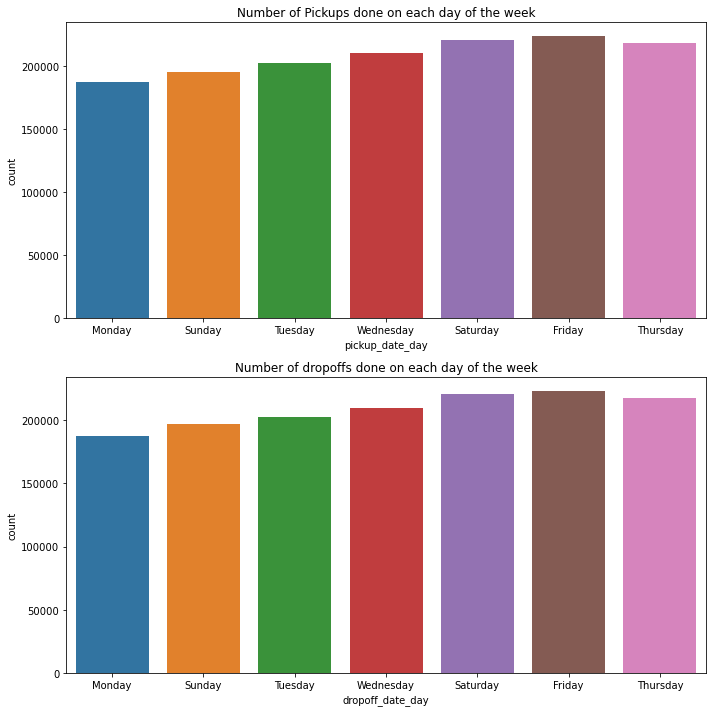

In [25]:
# Analysis with respect to day

figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_date_day',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_date_day',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

### We could see that Friday, Thursday and Saturday which will be busisest and time taken to complete the trip would be more on these days

C:\Users\Roopesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pickup_hour', ylabel='count'>

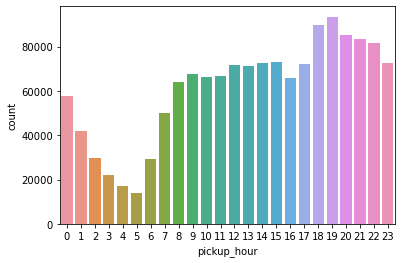

In [26]:
# Analysis on peak hour
sns.countplot(df['pickup_hour'])

### We could see that at 19,18,21,22 more trips were booked

In [27]:
# Trying to analyse the hours with respect to timezones
bins=np.array([0,1800,3600,5400,7200,90000])
df['timezone_hour'] = df['pickup_hour']
df['timezone_hour']=pd.cut(df.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

In [28]:
import datetime
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
df['pickup_timezone']=df['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

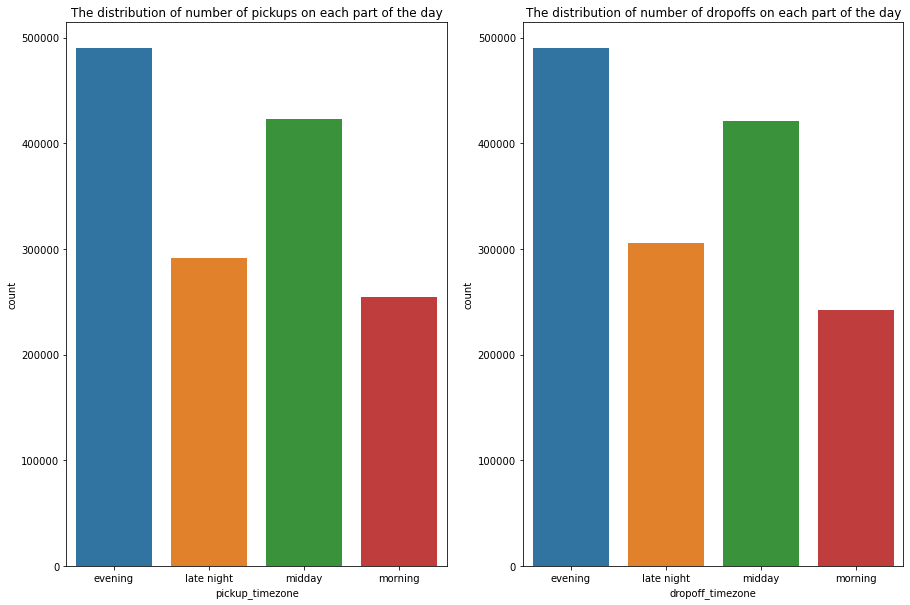

In [29]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,10))
sns.countplot(x='pickup_timezone',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.show()

Text(0.5, 1.0, 'The Distribution of percentage of different duration of trips')

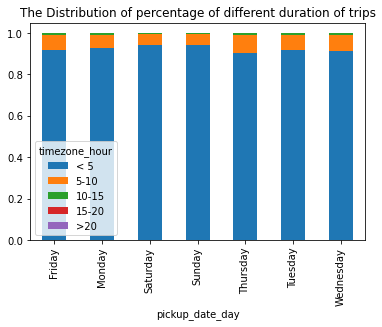

In [30]:
ax1=df.groupby('pickup_date_day')['timezone_hour'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True')
plt.title('The Distribution of percentage of different duration of trips')

#### As we could see most of the trips were under 5 hours

# Assumptions:
### 1. Trips less than 200 mt and greater than 50 km are considered as outliers.
### 2. Trips taking more than 12 hours are also considered to be outliers.
### 3. Passenger count equal 0,7,8,9 are considered outliers.

In [31]:
# Making a copy of the original dataset
dfmean = df

In [32]:
# Mean for replacing the outliers in distance

df['Distance'].mean()

3.4408639020108267

In [33]:
# Removing the outliers of passenger count,time and replacing outliers of Distance with its mean

dfmean['Distance'] = np.where(dfmean['Distance'] < 0.2, 3.44, dfmean['Distance'])
dfmean['Distance'] = np.where(dfmean['Distance'] > 50, 3.44, dfmean['Distance'])
dfmean = dfmean[(dfmean['passenger_count']>0) & (dfmean['passenger_count']<8)]
dfmean = dfmean[dfmean['time_hr']<12]
dfmean= dfmean[dfmean['time_hr']>0.034]

# Bivariate Data Analysis

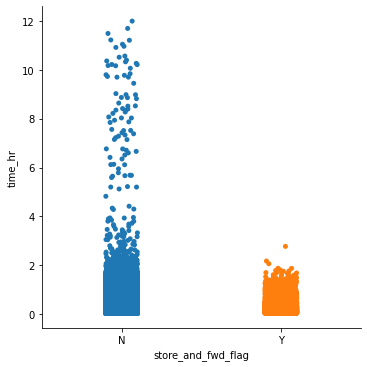

In [34]:
sns.catplot(x="store_and_fwd_flag", y="time_hr",kind="strip",data=dfmean)

<AxesSubplot:xlabel='Distance', ylabel='time_hr'>

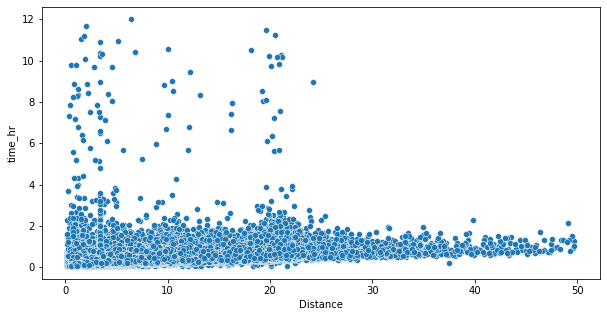

In [35]:
fig = plt.figure(figsize=(10, 5))
sns.scatterplot(x='Distance',y='time_hr',data=dfmean)

### We could see almost a linear relationship between Distance and time which is obvious.

<AxesSubplot:xlabel='vendor_id', ylabel='time_hr'>

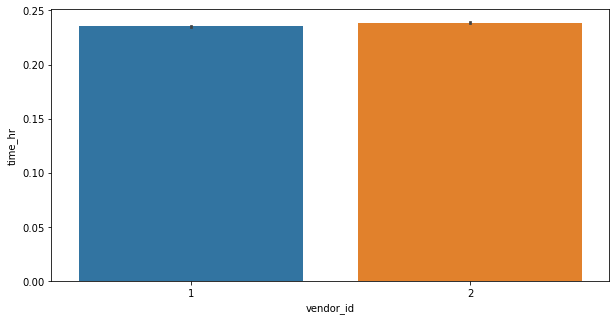

In [36]:
fig = plt.figure(figsize=(10, 5))
sns.barplot(x='vendor_id',y='time_hr',data=dfmean)

### From these we could assume that vendor with id 2 is sort of giving little longer duration rides than vendor id 1

<AxesSubplot:xlabel='passenger_count', ylabel='time_hr'>

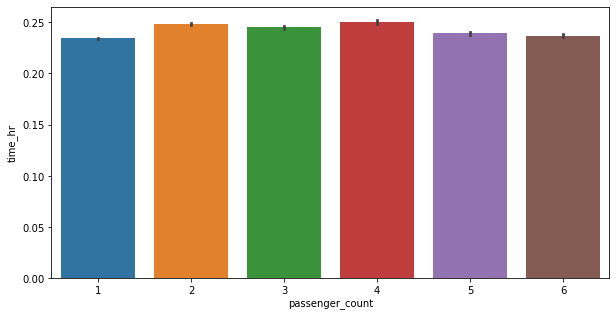

In [37]:
fig = plt.figure(figsize=(10, 5))
sns.barplot(x='passenger_count',y='time_hr',data=dfmean)

### We could see trips with passenger count 2 and 4 had a little longer duration

<AxesSubplot:xlabel='pickup_date_month', ylabel='time_hr'>

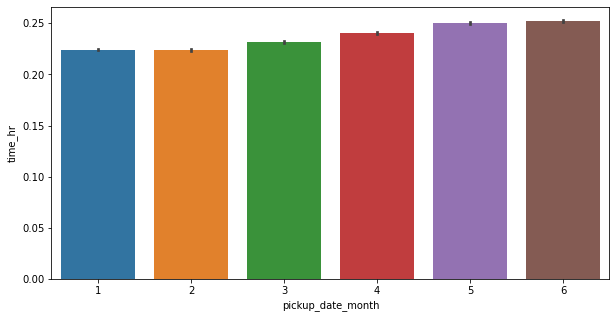

In [38]:
fig = plt.figure(figsize=(10, 5))
sns.barplot(x='pickup_date_month',y='time_hr',data=dfmean)

### Fromthe above graph we could conclude that trips taken in the 5,6 months were consuming little higher time.

# Creating dummy variables for regression

In [39]:
# Creating and renaming the created dummies


dfmean = pd.concat([dfmean, pd.get_dummies(dfmean['pickup_date_day'])], axis=1)
dfmean = pd.concat([dfmean, pd.get_dummies(dfmean['store_and_fwd_flag'])], axis=1)
dfmean = pd.concat([dfmean, pd.get_dummies(dfmean['vendor_id'])],axis=1)

In [40]:
dfmean.rename(columns={1:'vid1',2:'vid2','N':'flag_N','Y':'flag_Y'},inplace=True)

In [41]:
dfmean = pd.concat([dfmean,pd.get_dummies(dfmean['pickup_date_month'])],axis=1)

In [42]:
dfmean.rename(columns={1:'m1',2:'m2',3:'m3',4:'m4',5:'m5',6:'m6'},inplace=True)

In [43]:
dfmean = pd.concat([dfmean,pd.get_dummies(dfmean['pickup_hour'])],axis=1)

In [44]:
# Dropping the columns which are not required for training the model

dfmean1 = dfmean.drop(columns=['trip_duration','pickup_latitude','pickup_longitude','dropoff_longitude','dropoff_latitude','vendor_id','pickup_datetime','dropoff_datetime','passenger_count','Speed','store_and_fwd_flag','id',
                              'pickup_timezone','week_in_num','pickup_date','pickup_hour','pickup_date_day','dropoff_timezone','pickup_date_month','dropoff_date_day','timezone_hour'])

In [45]:
dfmean1.columns

Index([  'time_hr',  'Distance',    'Friday',    'Monday',  'Saturday',
          'Sunday',  'Thursday',   'Tuesday', 'Wednesday',    'flag_N',
          'flag_Y',      'vid1',      'vid2',        'm1',        'm2',
              'm3',        'm4',        'm5',        'm6',           0,
                 1,           2,           3,           4,           5,
                 6,           7,           8,           9,          10,
                11,          12,          13,          14,          15,
                16,          17,          18,          19,          20,
                21,          22,          23],
      dtype='object')

# Building models

In [46]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error 
from sklearn.dummy import DummyRegressor 

In [47]:
# Creating dataframes with respect to dependent and independent features

X_mean = dfmean1.drop('time_hr',axis=1)
Y_mean = dfmean1['time_hr']
X_train_mean, X_test_mean, Y_train_mean, Y_test_mean = train_test_split(X_mean,Y_mean,test_size = 0.25, random_state=1)

In [48]:
X_train_mean.shape

(1070435, 42)

In [49]:
# Creating a Baseline model

lm_dummy = DummyRegressor(strategy = 'mean').fit(X_train_mean, Y_train_mean) 
Y_predict_dummy = lm_dummy.predict(X_test_mean)
print("Root Mean squared error (dummy): {:.2f}".format(mean_squared_error(Y_test_mean,Y_predict_dummy,squared=False)))
print("r2_score (dummy mean): {:.2f}".format(r2_score(Y_test_mean, Y_predict_dummy)))

Root Mean squared error (dummy): 0.20
r2_score (dummy mean): -0.00


In [50]:
# Experiment 1 to carry out the model based on Random forest Regressor
# Importing and creating the instance of the model

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()

In [51]:
# Creating list of parameters to try on for RandomizedSearchCV

params = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [5,10,15,20,25]}

In [52]:
# Setting up RandomizedSearchcv

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [53]:
# Starting the model and carrying out with no.of folds = 3

rf_random.fit(X_train_mean,Y_train_mean)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 70.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [5, 10, 15, 20, 25]},
                   random_state=42, verbose=2)

In [54]:
# Seeing the best estimator

rf_random.best_estimator_

RandomForestRegressor(max_depth=40, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=25)

In [55]:
# Seeing the best parameters for the model

rf_random.best_params_

{'n_estimators': 25,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 40}

In [56]:
# Creating instance of the best model

best_rfmodel = rf_random.best_estimator_

In [57]:
# Training the best model

best_rfmodel.fit(X_train_mean,Y_train_mean)

RandomForestRegressor(max_depth=40, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=25)

In [58]:
# Capturing the predictions of our model on training dataset

train_pred = best_rfmodel.predict(X_train_mean)

In [59]:
# Capturing the predictions of our model on testing dataset

test_pred = best_rfmodel.predict(X_test_mean)

In [60]:
train_pred

array([0.21545678, 0.21982377, 0.6899864 , ..., 0.19891202, 0.47018309,
       0.55862478])

In [61]:
test_pred

array([0.10019178, 0.39418871, 0.17591299, ..., 0.45176048, 0.14325246,
       0.17661218])

In [63]:
# Results of training and testing datasets by our model, 
# through this we could say that our model is better than baseline model

print(mean_squared_error(Y_train_mean,train_pred,squared=False))
print(mean_squared_error(Y_test_mean,test_pred,squared=False))
print("r2_score (test): {:.2f}".format(r2_score(Y_test_mean,test_pred)))
print("r2_score (train): {:.2f}".format(r2_score(Y_train_mean,train_pred)))

0.10151047535405232
0.1222170932924793
r2_score (test): 0.61
r2_score (train): 0.72


In [66]:
# Experiment 2 to carry out the model based on xgboost algorithm


import xgboost as xg
xgb_r = xg.XGBRegressor()

xgb_r.fit(X_train_mean,Y_train_mean)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
# Capturing the predictions of our model on training dataset

xg_train_pred_mean = xgb_r.predict(X_train_mean)
xg_test_pred_mean = xgb_r.predict(X_test_mean)

In [68]:
xg_train_pred_mean

array([0.21582007, 0.2539647 , 0.661946  , ..., 0.22154336, 0.54973686,
       0.5276227 ], dtype=float32)

In [69]:
xg_test_pred_mean

array([0.07982297, 0.45540816, 0.22982764, ..., 0.40103254, 0.11979496,
       0.20440054], dtype=float32)

In [70]:
# Scores of MSE and R2

print(mean_squared_error(Y_train_mean,xg_train_pred_mean,squared=False))
print(mean_squared_error(Y_test_mean,xg_test_pred_mean,squared=False))
print("r2_score (train): {:.2f}".format(r2_score(Y_train_mean,xg_train_pred_mean)))
print("r2_score (test): {:.2f}".format(r2_score(Y_test_mean,xg_test_pred_mean)))

0.11046245402769994
0.11927136005927925
r2_score (train): 0.67
r2_score (test): 0.63


In [71]:
# Experiment 3 to carry out the model based on Linear Regression

In [72]:
# Trying stock Linear Regression model

from sklearn.linear_model import LinearRegression
lregro = LinearRegression()
lregro.fit(X_train_mean,Y_train_mean)

LinearRegression()

In [73]:
lr_train_pred_mean = lregro.predict(X_train_mean)
lr_test_pred_mean = lregro.predict(X_test_mean)

In [74]:
lr_train_pred_mean

array([0.23207879, 0.21306014, 0.8563838 , ..., 0.21930885, 0.48364019,
       0.60119939])

In [75]:
lr_test_pred_mean

array([0.08138418, 0.37716937, 0.22362018, ..., 0.32677388, 0.1406858 ,
       0.18476272])

In [76]:
# We could see that linear regression also dont have any noticable improvement

print(mean_squared_error(Y_train_mean,lr_train_pred_mean,squared=False))
print(mean_squared_error(Y_test_mean,lr_test_pred_mean,squared=False))
print("r2_score (train): {:.2f}".format(r2_score(Y_train_mean,lr_train_pred_mean)))
print("r2_score (test): {:.2f}".format(r2_score(Y_test_mean,lr_test_pred_mean)))

0.12681494549872777
0.13015106272505528
r2_score (train): 0.57
r2_score (test): 0.56


In [77]:
# Trying to add regularization to the linear regression to check if there is any improvement

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [78]:
# Lasso

lassolr = Lasso()
lassolr.fit(X_train_mean,Y_train_mean)
lassolr_train_pred_mean = lassolr.predict(X_train_mean)
lassolr_test_pred_mean = lassolr.predict(X_test_mean)

In [79]:
lassolr_train_pred_mean

array([0.23727213, 0.23727213, 0.23727213, ..., 0.23727213, 0.23727213,
       0.23727213])

In [80]:
lassolr_test_pred_mean

array([0.23727213, 0.23727213, 0.23727213, ..., 0.23727213, 0.23727213,
       0.23727213])

In [81]:
print(mean_squared_error(Y_train_mean,lassolr_train_pred_mean,squared=False))
print(mean_squared_error(Y_test_mean,lassolr_test_pred_mean,squared=False))
print("r2_score (train): {:.2f}".format(r2_score(Y_train_mean,lassolr_train_pred_mean)))
print("r2_score (test): {:.2f}".format(r2_score(Y_test_mean,lassolr_test_pred_mean)))

0.19241855393468554
0.19512220008910938
r2_score (train): 0.00
r2_score (test): -0.00


In [82]:
# Ridge

ridgelr = Ridge()
ridgelr.fit(X_train_mean,Y_train_mean)
ridgelr_train_pred_mean = ridgelr.predict(X_train_mean)
ridgelr_test_pred_mean = ridgelr.predict(X_test_mean)

In [83]:
ridgelr_train_pred_mean

array([0.23208405, 0.2130599 , 0.85638232, ..., 0.21931003, 0.48364392,
       0.60119694])

In [84]:
ridgelr_test_pred_mean

array([0.08138163, 0.37716526, 0.22362489, ..., 0.32677292, 0.14068423,
       0.18475921])

In [85]:
print(mean_squared_error(Y_train_mean,ridgelr_train_pred_mean,squared=False))
print(mean_squared_error(Y_test_mean,ridgelr_test_pred_mean,squared=False))
print("r2_score (train): {:.2f}".format(r2_score(Y_train_mean,ridgelr_train_pred_mean)))
print("r2_score (test): {:.2f}".format(r2_score(Y_test_mean,ridgelr_test_pred_mean)))

0.12681494541792712
0.13015106075899643
r2_score (train): 0.57
r2_score (test): 0.56


In [86]:
# Lasso with gridsearchcv

from sklearn.model_selection import GridSearchCV
### Cross validation
lassolr = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lassolr, parameters, scoring='r2')
lasso_regressor.fit(X_train_mean, Y_train_mean)

C:\Users\Roopesh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214.15701095878467, tolerance: 3.148899398572099
  model = cd_fast.enet_coordinate_descent(
C:\Users\Roopesh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211.4996596248384, tolerance: 3.134536879255044
  model = cd_fast.enet_coordinate_descent(
C:\Users\Roopesh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 364.9296049754794, tolerance: 3.168980342992495
  model = cd_fast.enet_coordinate_descent(
C:\Users\Roopesh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Converge

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [87]:
lasso_regressor.best_params_

{'alpha': 1e-15}

In [88]:
lasso_lr = lasso_regressor.best_estimator_

In [89]:
lasso_lr.fit(X_train_mean,Y_train_mean)
lasso_lr_train_pred = lasso_lr.predict(X_train_mean)
lasso_lr_test_pred = lasso_lr.predict(X_test_mean)

C:\Users\Roopesh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 268.91649319670614, tolerance: 3.96327487226533
  model = cd_fast.enet_coordinate_descent(


In [90]:
lasso_lr_train_pred

array([0.23208475, 0.21306048, 0.85638256, ..., 0.21931082, 0.4836444 ,
       0.60119796])

In [91]:
lasso_lr_test_pred

array([0.08138108, 0.37716608, 0.22362565, ..., 0.32677368, 0.14068413,
       0.18475869])

In [92]:
print(mean_squared_error(Y_train_mean,lasso_lr_train_pred,squared=False))
print(mean_squared_error(Y_test_mean,lasso_lr_test_pred,squared=False))
print("r2_score (train): {:.2f}".format(r2_score(Y_train_mean,lasso_lr_train_pred)))
print("r2_score (test): {:.2f}".format(r2_score(Y_test_mean,lasso_lr_test_pred)))

0.12681494541102278
0.13015106178632163
r2_score (train): 0.57
r2_score (test): 0.56


C:\Users\Roopesh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


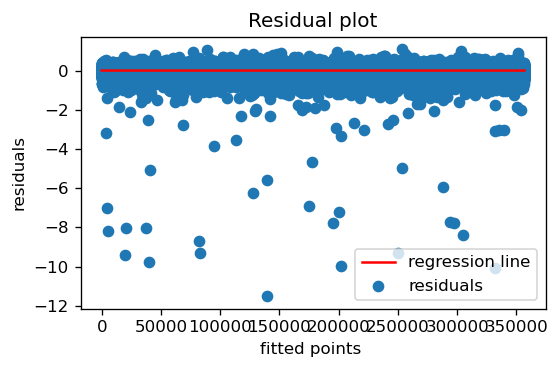

In [93]:
# Checking for Homoscedasticity
residuals=lasso_lr_test_pred-Y_test_mean

plt.figure(figsize=(5, 3), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(Y_test_mean))
k = [0 for i in range(0,len(Y_test_mean))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

### DecisionTreeRegressor

In [94]:
from sklearn.tree import DecisionTreeRegressor

In [95]:
dcr = DecisionTreeRegressor()

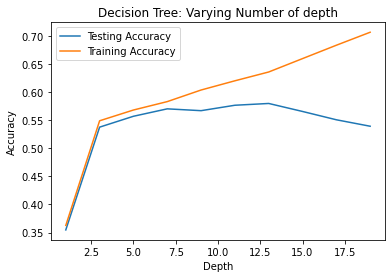

In [96]:
neighbors = np.arange(1, 20,2)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    sc=StandardScaler()
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_mean,Y_mean,test_size=0.25,random_state=1)
    scaledX_train = sc.fit_transform(Xtrain)
    scaledX_test = sc.transform(Xtest)
    dtr = DecisionTreeRegressor(max_depth=k)
    dtr.fit(scaledX_train,ytrain)
    train_accuracy_plot[i] = dtr.score(scaledX_train,ytrain)
    test_accuracy_plot[i] = dtr.score(scaledX_test,ytest) 
# Generate plot
plt.title('Decision Tree: Varying Number of depth')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

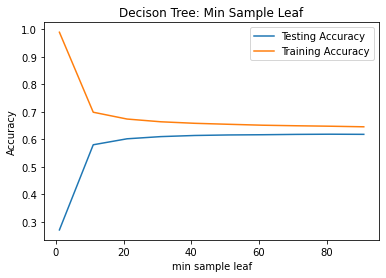

In [97]:
neighbors = np.arange(1, 100,10)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    sc=StandardScaler()
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_mean,Y_mean,test_size=0.25,random_state=1)
    scaledX_train = sc.fit_transform(Xtrain)
    scaledX_test = sc.transform(Xtest)
    dtr = DecisionTreeRegressor(min_samples_leaf=k)
    dtr.fit(scaledX_train,ytrain)
    train_accuracy_plot[i] = dtr.score(scaledX_train,ytrain)
    test_accuracy_plot[i] = dtr.score(scaledX_test,ytest) 
# Generate plot
plt.title('Decison Tree: Min Sample Leaf')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('min sample leaf')
plt.ylabel('Accuracy')
plt.show()

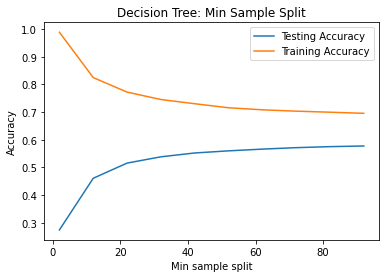

In [98]:
neighbors = np.arange(2, 100,10)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    sc=StandardScaler()
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_mean,Y_mean,test_size=0.25,random_state=1)
    scaledX_train = sc.fit_transform(Xtrain)
    scaledX_test = sc.transform(Xtest)
    dtr = DecisionTreeRegressor(min_samples_split=k)
    dtr.fit(scaledX_train,ytrain)
    train_accuracy_plot[i] = dtr.score(scaledX_train,ytrain)
    test_accuracy_plot[i] = dtr.score(scaledX_test,ytest) 
# Generate plot
plt.title('Decision Tree: Min Sample Split')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Min sample split')
plt.ylabel('Accuracy')
plt.show()

In [99]:
dcr = DecisionTreeRegressor(max_depth=12,min_samples_leaf=60,min_samples_split=80)

In [100]:
dcr.fit(X_train_mean,Y_train_mean)

DecisionTreeRegressor(max_depth=12, min_samples_leaf=60, min_samples_split=80)

In [101]:
prediction_dcr_train = dcr.predict(X_train_mean)
prediction_dcr_test = dcr.predict(X_test_mean)

In [102]:
mse_dcr  = mean_squared_error((ytrain), (prediction_dcr_train))
print("MSE :" , mse_dcr)

rmse_dcr = np.sqrt(mse_dcr)

print("RMSE :" ,rmse_dcr)

dcr_score = r2_score((ytrain), (prediction_dcr_train))
print("R2 :" ,dcr_score)
adj = 1-(1-r2_score((ytrain), (prediction_dcr_train)))*((Xtrain.shape[0]-1)/(Xtrain.shape[0]-Xtrain.shape[1]-1))
print("Adjusted R2 : ",adj)

MSE : 0.014442707648275498
RMSE : 0.12017781678943705
R2 : 0.6099190629025145
Adjusted R2 :  0.609903756921754


In [103]:
#Test set metrics
mse_test  = mean_squared_error((ytest), (prediction_dcr_test))
print("MSE :" , mse_test)

rmse_test = np.sqrt(mse_test)
print("RMSE :" ,rmse_test)

score_test = r2_score((ytest), (prediction_dcr_test))
print("R2 :" ,score_test)
adj_test = 1-(1-r2_score((ytest), (prediction_dcr_test)))*((Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1))
print("Adjusted R2 : ",adj_test)

MSE : 0.015483941143314767
RMSE : 0.12443448534596335
R2 : 0.5933050732760956
Adjusted R2 :  0.5932571958346071
